To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News


Unsloth's [Docker image](https://hub.docker.com/r/unsloth/unsloth) is here! Start training with no setup & environment issues. [Read our Guide](https://docs.unsloth.ai/new/how-to-train-llms-with-unsloth-and-docker).

[gpt-oss RL](https://docs.unsloth.ai/new/gpt-oss-reinforcement-learning) is now supported with the fastest inference & lowest VRAM. Try our [new notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/gpt-oss-(20B)-GRPO.ipynb) which creates kernels!

Introducing [Vision](https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl) and [Standby](https://docs.unsloth.ai/basics/memory-efficient-rl) for RL! Train Qwen, Gemma etc. VLMs with GSPO - even faster with less VRAM.

Unsloth now supports Text-to-Speech (TTS) models. Read our [guide here](https://docs.unsloth.ai/basics/text-to-speech-tts-fine-tuning).

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [1]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    import torch; v = re.match(r"[0-9\.]{3,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.32.post2" if v == "2.8.0" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.57.0
!pip install --no-deps trl==0.22.2

### Unsloth

We're also introducing how you can do `GSPO` inside of Unsloth as well!

The goal of this notebook is to make a vision language model solve maths problems via reinforcement learning given an image input like below:

<img src="https://raw.githubusercontent.com/lupantech/MathVista/main/assets/our_new_3_datasets.png" alt="Alt text" height="256">

In [2]:
from unsloth import FastVisionModel
import torch
max_seq_length = 16384 # Must be this long for VLMs
lora_rank = 16 # Larger rank = smarter, but slower

model, tokenizer = FastVisionModel.from_pretrained(
    model_name = "unsloth/Qwen3-VL-8B-Instruct-unsloth-bnb-4bit",
    max_seq_length = max_seq_length,
    load_in_4bit = True, # False for LoRA 16bit
    fast_inference = False, # Enable vLLM fast inference
    gpu_memory_utilization = 0.8, # Reduce if out of memory

)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.10.6: Fast Qwen3_Vl patching. Transformers: 4.57.0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.72G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/817 [00:00<?, ?B/s]

In Unsloth, we share vLLM's weights directly, reducing VRAM usage by > 50%. vLLM also does not yet support LoRA on the vision layers, so we can only add them on the language layers. Vision GRPO still works though!

In [3]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = False, # False if not finetuning vision layers
    finetune_language_layers   = True,  # False if not finetuning language layers
    finetune_attention_modules = True,  # False if not finetuning attention layers
    finetune_mlp_modules       = True,  # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    use_gradient_checkpointing = "unsloth", # Reduces memory usage
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

### Data Prep
<a name="Data"></a>

`AI4Math/MathVista` is a dataset that involves using images to solve logic and math problems.

For this notebook, we will only use math problems with numeric answers for simpilicity.

In [4]:
from datasets import load_dataset
from trl import GRPOConfig, GRPOTrainer

dataset = load_dataset("AI4Math/MathVista", split = "testmini")

README.md: 0.00B [00:00, ?B/s]

data/testmini-00000-of-00001-725687bf7a1(…):   0%|          | 0.00/142M [00:00<?, ?B/s]

data/test-00000-of-00002-6b81bd7f7e2065e(…):   0%|          | 0.00/358M [00:00<?, ?B/s]

data/test-00001-of-00002-6a611c71596db30(…):   0%|          | 0.00/386M [00:00<?, ?B/s]

Generating testmini split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5141 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset
from trl import GRPOConfig, GRPOTrainer

dataset = load_dataset("PharMolix/Vis-CheBI20", split = "testmini")

README.md:   0%|          | 0.00/739 [00:00<?, ?B/s]

imgs/train.zip:   0%|          | 0.00/8.00G [00:00<?, ?B/s]

We filter the dataset to keep only float or numeric answers:

In [5]:
def is_numeric_answer(example):
    try:
        float(example["answer"])
        return True
    except:
        return False

dataset = dataset.filter(is_numeric_answer)

Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [5]:
dataset[0]['question']

"When a spring does work on an object, we cannot find the work by simply multiplying the spring force by the object's displacement. The reason is that there is no one value for the force-it changes. However, we can split the displacement up into an infinite number of tiny parts and then approximate the force in each as being constant. Integration sums the work done in all those parts. Here we use the generic result of the integration.\r\n\r\nIn Figure, a cumin canister of mass $m=0.40 \\mathrm{~kg}$ slides across a horizontal frictionless counter with speed $v=0.50 \\mathrm{~m} / \\mathrm{s}$. It then runs into and compresses a spring of spring constant $k=750 \\mathrm{~N} / \\mathrm{m}$. When the canister is momentarily stopped by the spring, by what distance $d$ is the spring compressed?"

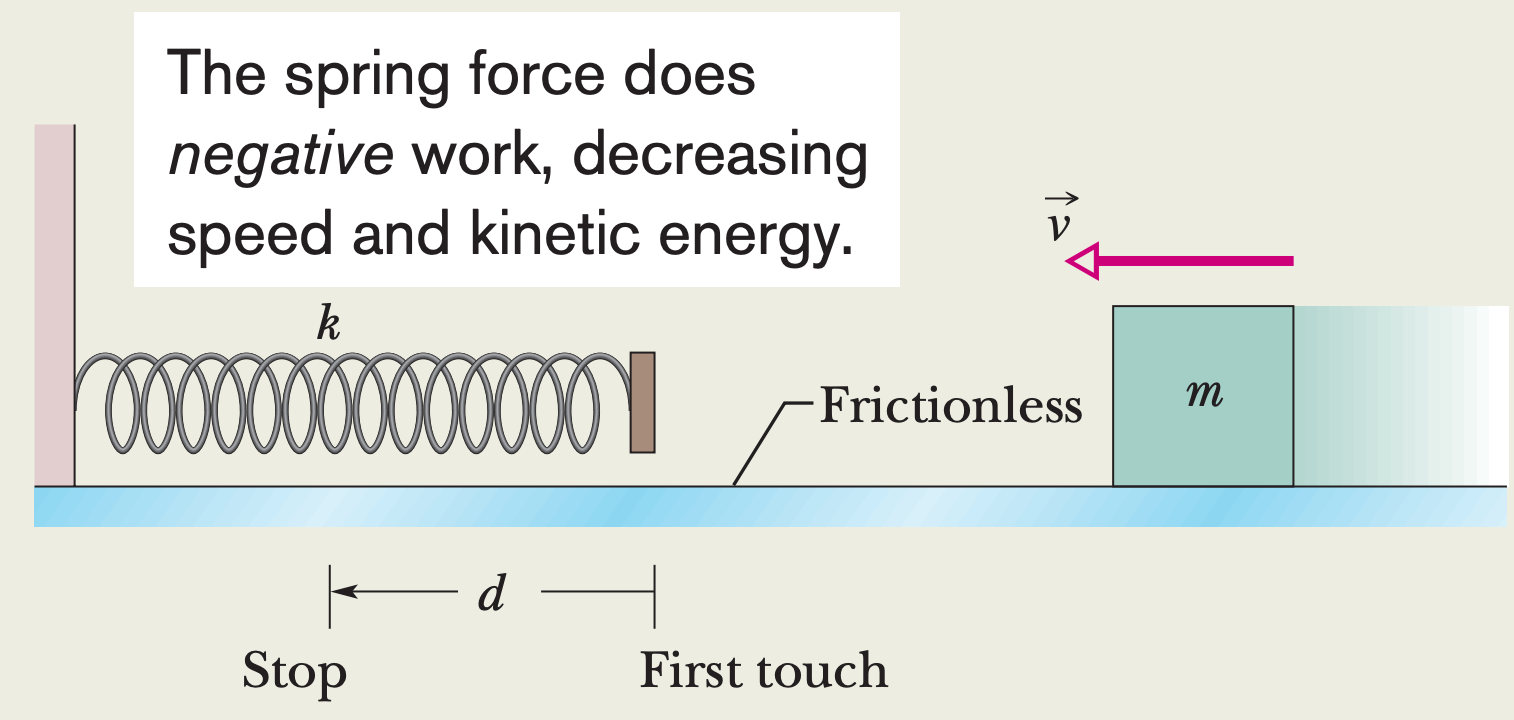

In [6]:
from IPython.display import display
display(dataset[0]["decoded_image"])

In [12]:
dataset[0]["answer"]

'1.2'

We also resize the images to be 512 by 512 pixels to make the images managable in context length. We also convert them to RGB so they are compatible for training!

In [ ]:
# Resize to (512, 512)
def resize_images(example):
    image = example["decoded_image"]
    image = image.resize((512, 512))
    example["decoded_image"] = image
    return example
dataset = dataset.map(resize_images)

# Then convert to RGB
def convert_to_rgb(example):
    image = example["decoded_image"]
    if image.mode != "RGB":
        image = image.convert("RGB")
    example["decoded_image"] = image
    return example
dataset = dataset.map(convert_to_rgb)

Map:   0%|          | 0/566 [00:00<?, ? examples/s]

Map:   0%|          | 0/566 [00:00<?, ? examples/s]

We then create the conversational template that is needed to collate the dataset for RL:

In [ ]:
# Define the delimiter variables for clarity and easy modification
REASONING_START = "<REASONING>"
REASONING_END = "</REASONING>"
SOLUTION_START = "<SOLUTION>"
SOLUTION_END = "</SOLUTION>"

def make_conversation(example):
    # Define placeholder constants if they are not defined globally
    # The user's text prompt
    text_content = (
        f"{example['question']}. Also first provide your reasoning or working out"\
        f" on how you would go about solving the question between {REASONING_START} and {REASONING_END}"
        f" and then your final answer between {SOLUTION_START} and (put a single float here) {SOLUTION_END}"
    )

    # Construct the prompt in the desired multi-modal format
    prompt = [
        {
            "role": "user",
            "content": [
                {"type": "image"},  # Placeholder for the image
                {"type": "text", "text": text_content},  # The text part of the prompt
            ],
        },
    ]
    # The actual image data is kept separate for the processor
    return {"prompt": prompt, "image": example["decoded_image"], "answer": example["answer"]}

train_dataset = dataset.map(make_conversation)

# We're reformatting dataset like this because decoded_images are the actual images
# The "image": example["decoded_image"] does not properly format the dataset correctly

# 1. Remove the original 'image' column
train_dataset = train_dataset.remove_columns("image")

# 2. Rename 'decoded_image' to 'image'
train_dataset = train_dataset.rename_column("decoded_image", "image")

Map:   0%|          | 0/566 [00:00<?, ? examples/s]

Now let's apply the chat template across the entire dataset:

In [ ]:
train_dataset = train_dataset.map(
    lambda example: {
        "prompt": tokenizer.apply_chat_template(
            example["prompt"],
            tokenize = False,
            add_generation_prompt = True, # Must add assistant
        )
    }
)

Map:   0%|          | 0/566 [00:00<?, ? examples/s]

## Reward functions

We now define some basic formatting rewards functions to see if reasoning starts and ends, and also another to see if the answers were written correctly.

We also try to fix the `addCriterion` issue as described in our [blog post](https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl#qwen-2.5-vl-vision-rl-issues-and-quirks)

In [ ]:
# Reward functions
import re

def formatting_reward_func(completions,**kwargs):
    import re
    thinking_pattern = f'{REASONING_START}(.*?){REASONING_END}'
    answer_pattern = f'{SOLUTION_START}(.*?){SOLUTION_END}'

    scores = []
    for completion in completions:
        score = 0
        thinking_matches = re.findall(thinking_pattern, completion, re.DOTALL)
        answer_matches = re.findall(answer_pattern, completion, re.DOTALL)
        if len(thinking_matches) == 1:
            score += 1.0
        if len(answer_matches) == 1:
            score += 1.0

        # Fix up addCriterion issues
        # See https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl#qwen-2.5-vl-vision-rl-issues-and-quirks
        # Penalize on excessive addCriterion and newlines
        if len(completion) != 0:
            removal = completion.replace("addCriterion", "").replace("\n", "")
            if (len(completion)-len(removal))/len(completion) >= 0.5:
                score -= 2.0

        scores.append(score)
    return scores


def correctness_reward_func(prompts, completions, answer, **kwargs) -> list[float]:
    answer_pattern = f'{SOLUTION_START}(.*?){SOLUTION_END}'

    responses = [re.findall(answer_pattern, completion, re.DOTALL) for completion in completions]
    q = prompts[0]
    print('-'*20, f"Question:\n{q}", f"\nAnswer:\n{answer[0]}", f"\nResponse:{completions[0]}")
    return [
        2.0 if len(r)==1 and a == r[0].replace('\n','') else 0.0
        for r, a in zip(responses, answer)
    ]

Here is the first example prompt in the dataset

In [ ]:
train_dataset[0]["prompt"]

"<|im_start|>user\n<|vision_start|><|image_pad|><|vision_end|>When a spring does work on an object, we cannot find the work by simply multiplying the spring force by the object's displacement. The reason is that there is no one value for the force-it changes. However, we can split the displacement up into an infinite number of tiny parts and then approximate the force in each as being constant. Integration sums the work done in all those parts. Here we use the generic result of the integration.\r\n\r\nIn Figure, a cumin canister of mass $m=0.40 \\mathrm{~kg}$ slides across a horizontal frictionless counter with speed $v=0.50 \\mathrm{~m} / \\mathrm{s}$. It then runs into and compresses a spring of spring constant $k=750 \\mathrm{~N} / \\mathrm{m}$. When the canister is momentarily stopped by the spring, by what distance $d$ is the spring compressed?. Also first provide your reasoning or working out on how you would go about solving the question between <REASONING> and </REASONING> and 

In [ ]:
train_dataset[100]["prompt"]

'<|im_start|>user\n<|vision_start|><|image_pad|><|vision_end|>Move the ruler to measure the length of the nail to the nearest inch. The nail is about (_) inches long.. Also first provide your reasoning or working out on how you would go about solving the question between <REASONING> and </REASONING> and then your final answer between <SOLUTION> and (put a single float here) </SOLUTION><|im_end|>\n<|im_start|>assistant\n'

<a name="Inference"></a>
### Inference
Now let's try the model on the hundredth sample of the train dataset without training.


In [ ]:
image = train_dataset[100]["image"]
prompt = train_dataset[100]["prompt"]

inputs = tokenizer(
    image,
    prompt,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 1024,
                   use_cache = True, temperature = 1.0, min_p = 0.1)

<REASONING>
To measure the length of the nail to the nearest inch, I need to determine how long the nail is by comparing it to the ruler.

Step 1: Identify the starting point of the nail.
The head of the nail (the circular part) is aligned with the 0-inch mark on the ruler.

Step 2: Identify the ending point of the nail.
The sharp tip of the nail extends past the 3-inch mark but does not reach the 4-inch mark.

Step 3: Determine the length to the nearest inch.
Since the tip is between 3 and 4 inches, and we are rounding to the nearest inch, I need to see which whole number it is closer to. The tip is clearly past 3 and before 4, so I need to estimate if it's closer to 3 or 4.

Looking at the visual: the tip appears to be just shy of the 4-inch mark. It’s about 3.5 inches long (since it’s roughly halfway between 3 and 4), but since we need to round to the nearest inch, 3.5 rounds up to 4. However, let’s be precise. The nail's tip looks to be at approximately 3.2 to 3.4 inches. Since thi

<a name="Train"></a>
### Train the model

Now set up the `GRPO` Trainer and all configurations! Note we actually enable `GSPO` as well!

In [ ]:
from trl import GRPOConfig, GRPOTrainer
training_args = GRPOConfig(
    learning_rate = 5e-6,
    adam_beta1 = 0.9,
    adam_beta2 = 0.99,
    weight_decay = 0.1,
    warmup_ratio = 0.1,
    lr_scheduler_type = "cosine",
    optim = "adamw_8bit",
    logging_steps = 1,
    log_completions = False,
    per_device_train_batch_size = 1,
    gradient_accumulation_steps = 1, # Increase to 4 for smoother training
    num_generations = 2, # Decrease if out of memory
    max_prompt_length = 1024,
    max_completion_length = 1024,
    num_train_epochs = 0.5, # Set to 1 for a full training run
    # max_steps = 60,
    save_steps = 60,
    max_grad_norm = 0.1,
    report_to = "none", # Can use Weights & Biases
    output_dir = "outputs",

    # Below enables GSPO:
    importance_sampling_level = "sequence",
    mask_truncated_completions = False,
    loss_type = "dr_grpo",
)

Unsloth: We now expect `per_device_train_batch_size` to be a multiple of `num_generations`.
We will change the batch size of 1 to the `num_generations` of 2


And let's run the trainer! If you scroll up, you'll see a table of rewards. The goal is to see the `reward` column increase!

You might have to wait 150 to 200 steps for any action. You'll probably get 0 reward for the first 100 steps. Please be patient!

| Step | Training Loss | reward    | reward_std | completion_length | kl       |
|------|---------------|-----------|------------|-------------------|----------|
| 1    | 0.000000      | 0.125000  | 0.000000   | 200.000000        | 0.000000 |
| 2    | 0.000000      | 0.072375  | 0.248112   | 200.000000        | 0.000000 |
| 3    | 0.000000      | -0.079000 | 0.163776   | 182.500000        | 0.000005 |

During inference, you might encounter `addCriterion` or some weird gibberish outputs. Please read our [blog post](https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl#qwen-2.5-vl-vision-rl-issues-and-quirks) on why this occurs. It seems to be an inherent thing inside of the model, and we can ignore this.

In [ ]:
trainer = GRPOTrainer(
    model = model,
    args = training_args,
    # Pass the processor to handle multimodal inputs
    processing_class = tokenizer,
    reward_funcs = [
        formatting_reward_func,
        correctness_reward_func,
    ],
    train_dataset = train_dataset,
)

trainer.train()

The model is already on multiple devices. Skipping the move to device specified in `args`.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 566 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 1 x 1) = 2
 "-____-"     Trainable parameters = 43,646,976 of 8,810,770,672 (0.50% trained)


-------------------- Question:
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|>What is the highest value on the X axis?. Also first provide your reasoning or working out on how you would go about solving the question between <REASONING> and </REASONING> and then your final answer between <SOLUTION> and (put a single float here) </SOLUTION><|im_end|>
<|im_start|>assistant
 
Answer:
30 
Response:<REASONING>
To determine the highest value on the X-axis of the given graph, I need to examine the horizontal axis (X-axis) which is labeled "MICROGRAMS/ml-E-DNP-LYSINE-HCL". The X-axis has tick marks with labeled values: 0, 5, 10, 15, 20, 25, and 30. The last tick mark on the right side of the axis is labeled "30". Therefore, the highest value shown on the X-axis is 30.

</REASONING>
<SOLUTION>30.0</SOLUTION>


Step,Training Loss,reward,reward_std,completions / mean_length,completions / min_length,completions / max_length,completions / clipped_ratio,completions / mean_terminated_length,completions / min_terminated_length,completions / max_terminated_length,kl,rewards / formatting_reward_func / mean,rewards / formatting_reward_func / std,rewards / correctness_reward_func / mean,rewards / correctness_reward_func / std
1,0.000000,2.000000,0.000000,155.500000,134.000000,177.000000,0.000000,155.500000,134.000000,177.000000,0.000016,2.000000,0.000000,0.000000,0.000000
2,-0.008600,1.500000,0.707107,242.500000,230.000000,255.000000,0.000000,242.500000,230.000000,255.000000,0.000018,1.500000,0.707107,0.000000,0.000000
3,0.000000,2.000000,0.000000,607.000000,555.000000,659.000000,0.000000,607.000000,555.000000,659.000000,0.000031,2.000000,0.000000,0.000000,0.000000
4,0.000000,2.000000,0.000000,388.000000,308.000000,468.000000,0.000000,388.000000,308.000000,468.000000,0.000009,2.000000,0.000000,0.000000,0.000000
5,0.000000,2.000000,0.000000,347.000000,319.000000,375.000000,0.000000,347.000000,319.000000,375.000000,0.000020,2.000000,0.000000,0.000000,0.000000
6,0.000000,2.000000,0.000000,303.000000,300.000000,306.000000,0.000000,303.000000,300.000000,306.000000,0.000008,2.000000,0.000000,0.000000,0.000000
7,0.000000,2.000000,0.000000,317.500000,202.000000,433.000000,0.000000,317.500000,202.000000,433.000000,0.000008,2.000000,0.000000,0.000000,0.000000
8,0.000000,2.000000,0.000000,480.500000,430.000000,531.000000,0.000000,480.500000,430.000000,531.000000,0.000006,2.000000,0.000000,0.000000,0.000000
9,0.000000,2.000000,0.000000,466.000000,367.000000,565.000000,0.000000,466.000000,367.000000,565.000000,0.000006,2.000000,0.000000,0.000000,0.000000
10,0.000000,2.000000,0.000000,347.500000,323.000000,372.000000,0.000000,347.500000,323.000000,372.000000,0.000008,2.000000,0.000000,0.000000,0.000000


-------------------- Question:
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|>What is the age gap between these two people in image?. Also first provide your reasoning or working out on how you would go about solving the question between <REASONING> and </REASONING> and then your final answer between <SOLUTION> and (put a single float here) </SOLUTION><|im_end|>
<|im_start|>assistant
 
Answer:
6 
Response:<REASONING>
To determine the age gap between the two people in the image, I would need to analyze visual cues such as facial features, body proportions, hairstyle, clothing style, and context (e.g., era of the photo). However, this is a black-and-white photograph, and without clear identifiers like birth dates, names, or other contextual information (e.g., from a caption or historical record), it is impossible to accurately determine their actual ages or the age difference between them.

The image shows two men standing next to a makeshift hut. They appear to be young adu

TrainOutput(global_step=60, training_loss=0.010748568288023765, metrics={'train_runtime': 6405.6326, 'train_samples_per_second': 0.019, 'train_steps_per_second': 0.009, 'total_flos': 0.0, 'train_loss': 0.010748568288023765})

<a name="Inference"></a>
### Inference



Let's run the model! You can modify the instruction and input.

In [ ]:
image = train_dataset[165]["image"]
prompt = train_dataset[165]["prompt"]

inputs = tokenizer(
    image,
    prompt,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 1024,
                   use_cache = True, temperature = 1.0, min_p = 0.1)

<REASONING>
To find the magnitude of the average force on the driver during the collision, we need to apply the impulse-momentum theorem. The impulse (change in momentum) equals the average force multiplied by the time interval over which the force acts.

The change in momentum is given by:
Δp = m * Δv = m * (v_f - v_i)

However, since the velocities are vectors (with directions), we must resolve them into components perpendicular and parallel to the wall, because the wall exerts a force only perpendicular to the wall (normal force), and the parallel component of velocity typically does not change in an ideal elastic collision (though here it's inelastic, the parallel component might still be unchanged if the wall is perfectly rigid and the collision is only normal).

In this case, the car’s velocity has components parallel and perpendicular to the wall. The wall only exerts a force perpendicular to itself. Therefore, the component of velocity parallel to the wall should remain unchang

<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, use Hugging Face’s `push_to_hub` for online saving, or `save_pretrained` for local storage.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("grpo_lora")  # Local saving
tokenizer.save_pretrained("grpo_lora")
# model.push_to_hub("your_name/grpo_lora", token = "...") # Online saving
# processor.push_to_hub("your_name/grpo_lora", token = "...") # Online saving

[]

Verify LoRA is actually trained!

In [ ]:
from safetensors import safe_open

tensors = {}
with safe_open("grpo_lora/adapter_model.safetensors", framework = "pt") as f:
    # Verify both A and B are non zero
    for key in f.keys():
        tensor = f.get_tensor(key)
        n_zeros = (tensor == 0).sum() / tensor.numel()
        assert(n_zeros.item() != tensor.numel())

<a name="Save"></a>
### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16 or `merged_4bit` for int4. We also allow `lora` adapters as a fallback. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
# Merge to 16bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_16bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_16bit", token = "")

# Merge to 4bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_4bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_4bit", token = "")

# Just LoRA adapters
if False:
    model.save_pretrained("model")
    tokenizer.save_pretrained("model")
if False:
    model.push_to_hub("hf/model", token = "")
    tokenizer.push_to_hub("hf/model", token = "")

### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now! We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

[**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)

In [ ]:
# Save to 8bit Q8_0
if False: model.save_pretrained_gguf("model", tokenizer,)
# Remember to go to https://huggingface.co/settings/tokens for a token!
# And change hf to your username!
if False: model.push_to_hub_gguf("hf/model", tokenizer, token = "")

# Save to 16bit GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "f16")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "f16", token = "")

# Save to q4_k_m GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "q4_k_m")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "q4_k_m", token = "")

# Save to multiple GGUF options - much faster if you want multiple!
if False:
    model.push_to_hub_gguf(
        "hf/model", # Change hf to your username!
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_k_m",],
        token = "",
    )

Special Credits to [GAD-Cell](https://github.com/GAD-cell) for helping Unsloth create this notebook and bringing VLM GRPO into Unsloth!Now, use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in llama.cpp.

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Train your own reasoning model - Llama GRPO notebook [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️
</div>
